<p class="float-right">![logo](https://raw.githubusercontent.com/mmattamala/LogosFCFM/master/Ingenier%C3%ADa%20Matem%C3%A1tica/fcfm_dim_png.png)</p>

# Tarea 1


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

# P2 Regresión Lineal

In [2]:
data = np.genfromtxt('datosT1.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

### A continuación se grafica la data:

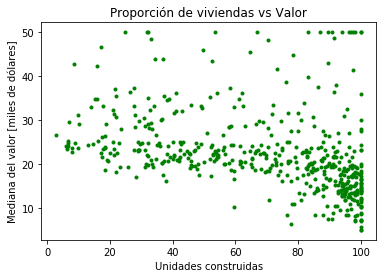

In [3]:
plt.title("Proporción de viviendas vs Valor")
plt.xlabel("Unidades construidas")
plt.ylabel("Mediana del valor [miles de dólares]")
plt.plot(x,y, 'g.')

### Regresión lineal regularizada

Sabemos que para la regresión lineal regularizada, el parámetro $\theta$ tiene la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Por lo que la identidad pertenecerá a $\rm I\!R^{2x2}$ y $\theta$ a $\rm I\!R^{2}$, lo cual tiene sentido ya que $\theta$ tiene la forma de un vector de dos componentes, cuyos valores corresponderán a la pendiente $m$ y el coeficiente de posición $b$ de una recta. 

In [13]:
x_tilda = np.array([x, np.ones(len(x))]).transpose()
y_reg = y
rho = 0
identidad = np.identity(2)

mul1 = np.linalg.inv(np.add(np.matmul(x_tilda.transpose(), x_tilda), np.dot(identidad, rho)))
mul2 = np.matmul(x_tilda.transpose(), y_reg)
theta = np.matmul(mul1, mul2)

In [ ]:
pdb.set_trace()
print("fin")

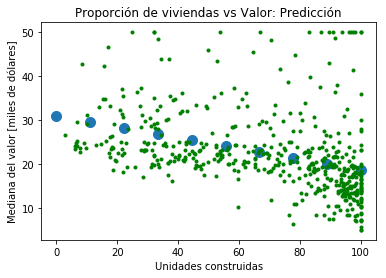

In [32]:
def recta(x): 
    return x * theta[0] + theta[1]

x_recta = np.linspace(0, 100, 10)
plt.title("Proporción de viviendas vs Valor: Predicción")
plt.xlabel("Unidades construidas")
plt.ylabel("Mediana del valor [miles de dólares]")
plt.scatter(x_recta,recta(x_recta), s=100)
plt.plot(x,y, 'g.', linewidth=500)